In [1]:
!pip install numpy


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pandas


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install seaborn


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#   Blinkit Analysis

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('blinkit_data.csv')

In [7]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [8]:
print("Sixe of Data:",df.shape)

Sixe of Data: (8523, 12)


In [9]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [10]:
#data types

df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

# Data Cleaning

In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [12]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})   

In [13]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


# Business Requirement

# KPI's Requirements 

In [14]:
# Total Sales
total_sales = df['Sales'].sum()


# Average Sales
average_sales = df['Sales'].mean()


# No of Item Sold
no_of_items_sold = df['Sales'].count()


# Average Rating
average_rating = df['Rating'].mean()


# Display the KPIs
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${average_sales:,.0f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")
print(f"Average Rating: {average_rating:,.0f}")

Total Sales: $1,201,681
Average Sales: $141
No of Items Sold: 8,523
Average Rating: 4


# Charts Requirements

#### Total Sales By Fat Content

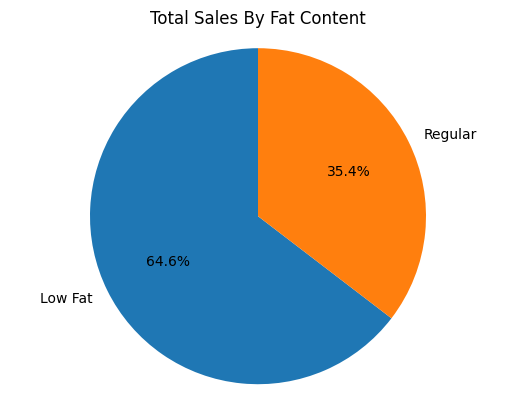

In [15]:
sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Sales By Fat Content')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Total Sales By Item Type

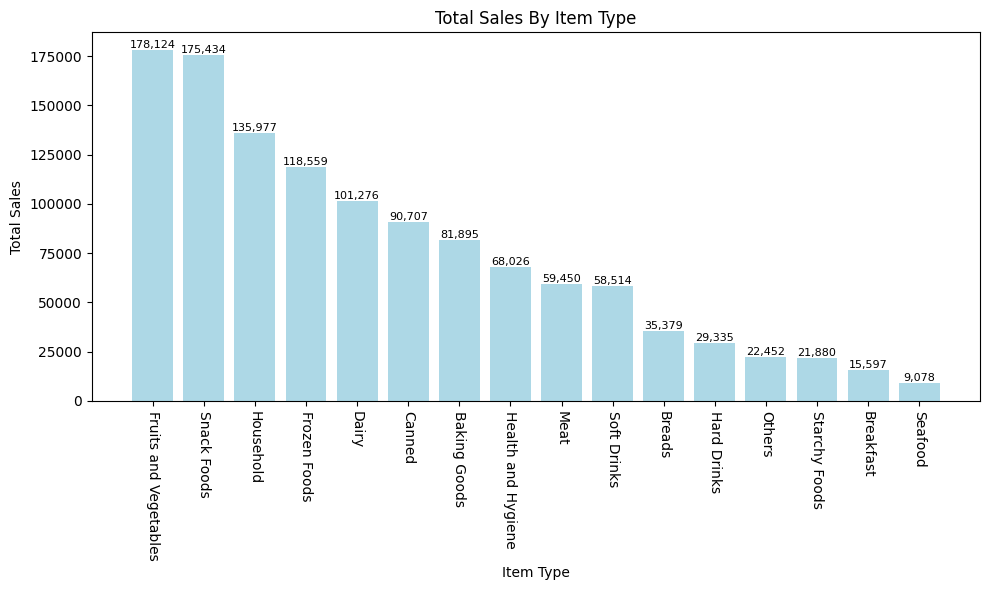

In [16]:
sale_by_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sale_by_type.index, sale_by_type.values, color='lightblue')

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales By Item Type')

# Adding value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Fat Content By Outlet for Total Sales

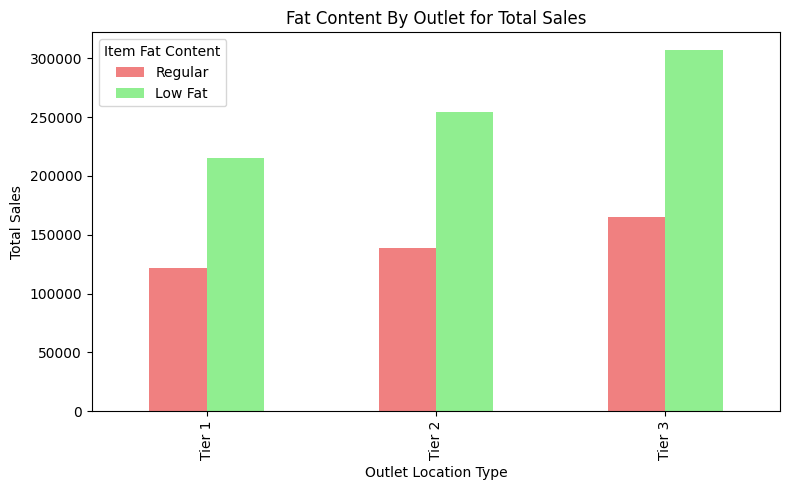

In [17]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]  # Reorder columns if necessary

ax = grouped.plot(kind='bar', figsize=(8,5) , title = 'Fat Content By Outlet for Total Sales', color=['lightcoral', 'lightgreen'])
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Establishment

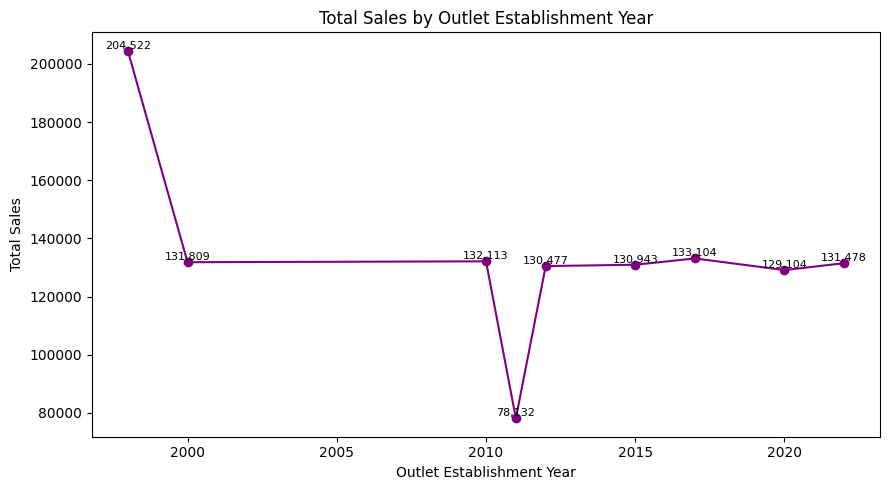

In [18]:
sale_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sale_by_year.index, sale_by_year.values, marker='o', linestyle='-', color='purple')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

for x, y in zip(sale_by_year.index, sale_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Sales By Outlet Size

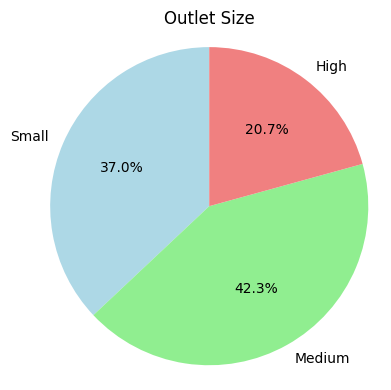

In [19]:
sales_by_size = df.groupby("Outlet Size")["Sales"].sum().reindex(['Small', 'Medium', 'High']).dropna()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Outlet Size')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

#### Sales By Outlet Location

C:\Users\MESHAK SELVA KUMAR\AppData\Local\Temp\ipykernel_22212\720007888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location, palette='viridis')


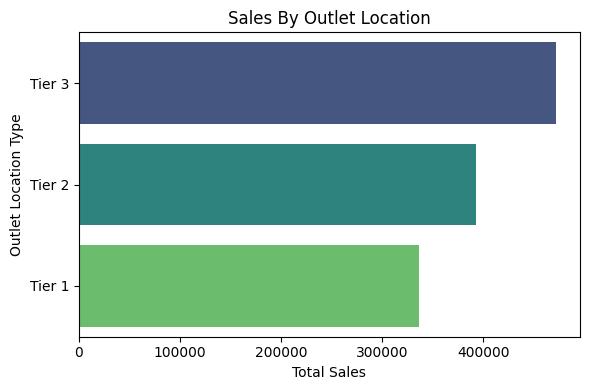

In [20]:
sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(6,4))
bars = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.title('Sales By Outlet Location')

plt.tight_layout()
plt.show()